# Day21 Airbnb in Berlin 2/5 listings overview 
# 柏林Airbnb 2/5 房源概述

今天從[Inside Airbnb](http://insideairbnb.com/get-the-data.html)下載的資料(listing.csv)，針對德國柏林地區的Airbnb房源初步分析。

The data (listing.csv) was collected from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), the data was last updated on 11/07/2019.
Today's article will briefly analysise the house listing of Airbnb in Berlin.

### 載入常用套件並讀入我們要分析的資料
### First, we need to import the packeges we need and read in the data we are about to analyse.

In [1]:
# 載入所需套件 import the packages we need
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # 畫互動式圖表的開源套件 graphing library makes interactive graphs
import seaborn as sns
import plotly as py 

import warnings # 忽略警告訊息 
warnings.filterwarnings("ignore") 

# 讀入listing檔案來分析 
Read in the listing file

In [2]:
listing = pd.read_csv('airbnb/listings.csv') # 讀入listing檔案來分析 read in the listing file
print('There are', listing.id.nunique(), 'listings in the listing data.')
listing.info() # 查看資料細節 the info of data
listing.head(3) # 叫出前三筆資料看看 print out the top three rows of data

There are 24395 listings in the listing data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24395 entries, 0 to 24394
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 19.7+ MB


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20190711004031,2019-07-11,cafeheaven Pberg/Mitte/Wed for the summer 2019,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,near all the trendy cafés and flea markets and...,...,f,f,moderate,f,f,1,0,1,0,0.25
1,2015,https://www.airbnb.com/rooms/2015,20190711004031,2019-07-11,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,moderate,f,f,4,4,0,0,3.18
2,3176,https://www.airbnb.com/rooms/3176,20190711004031,2019-07-11,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.18


# 印出listing數量前10的區域 
Print out the areas with top ten amounts of listings

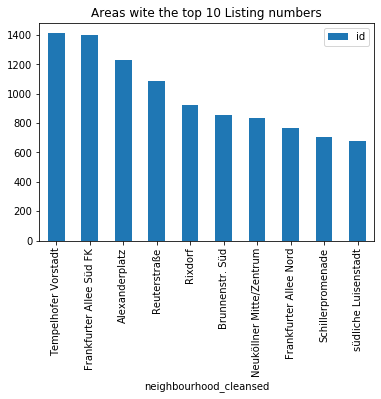

In [3]:
# 對數量做排序並只取前10存成grouped_df sort the listing and only save the top 10 listing in to grouped_df
grouped_df = listing.groupby('neighbourhood_cleansed').count()[['id']].sort_values('id', ascending=False).head(10) 
grouped_df.plot(kind='bar', title='Areas wite the top 10 Listing numbers')

In [4]:
grouped_df

,id
neighbourhood_cleansed,
Tempelhofer Vorstadt,1411
Frankfurter Allee Süd FK,1397
Alexanderplatz,1227
Reuterstraße,1087
Rixdorf,922
Brunnenstr. Süd,852
Neuköllner Mitte/Zentrum,837
Frankfurter Allee Nord,770
Schillerpromenade,705


# 畫出顧客評分圖 
Plot out the review scores 

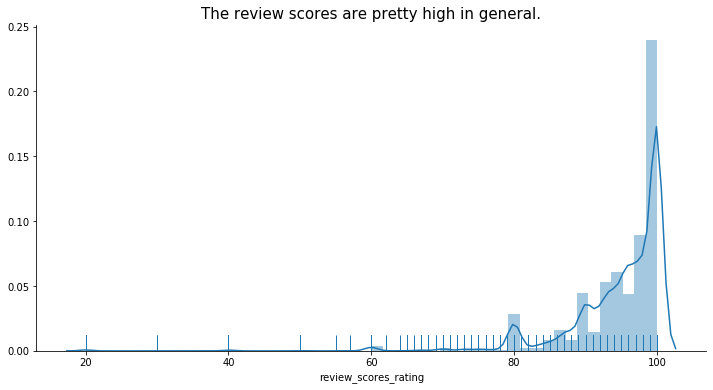

In [5]:
# 去缺失值並畫出顧客評分圖 drop missing values then plot out the review scores 
plt.figure(figsize=(12 , 6))
plt.title('The review scores are pretty high in general.', fontsize=15)
sns.distplot(listing.review_scores_rating.dropna(), rug=True)
sns.despine()

# 看看listing檔案中價格分布
Check out the price range of listings

count    24395.000000
mean        70.848166
std        214.400730
min          0.000000
25%         32.000000
50%         50.000000
75%         75.000000
max       9000.000000
Name: price, dtype: float64


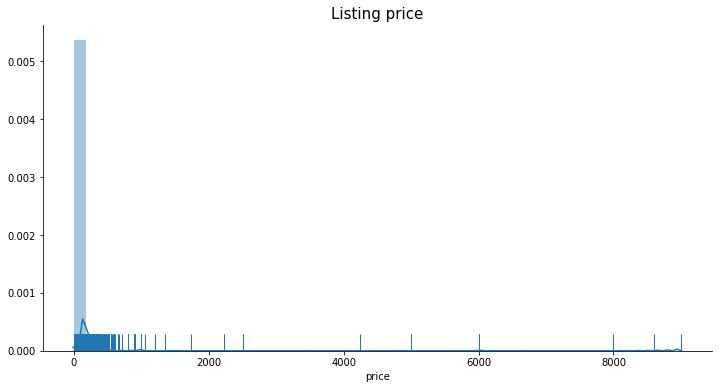

In [6]:
listing['price'] = listing['price'].astype(str).str.replace(',', '').astype(str).str.replace('$', '').astype(float) 

print(listing.price.describe()) # 印出一些價格分布數值 get an intuition of what the data look like
plt.figure(figsize = (12, 6))
plt.title('Listing price', fontsize=15)
sns.distplot(listing.price.dropna(), rug=True)
sns.despine()

# 去除離群值 
Plot without outliers

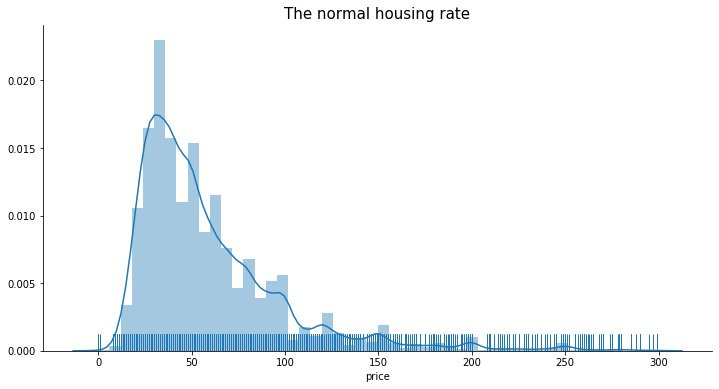

In [7]:
# 去除離群值 plot without outliers
plt.figure(figsize=(12 , 6))
plt.title('The normal housing rate', fontsize=15)
sns.distplot(listing[listing.price<300].price.dropna(), rug=True)
sns.despine()

# 畫出可接受價位區間的資料 
Plot out the data with reasonable price

Text(0.5, 1.0, 'Listings with Acceptable Price')

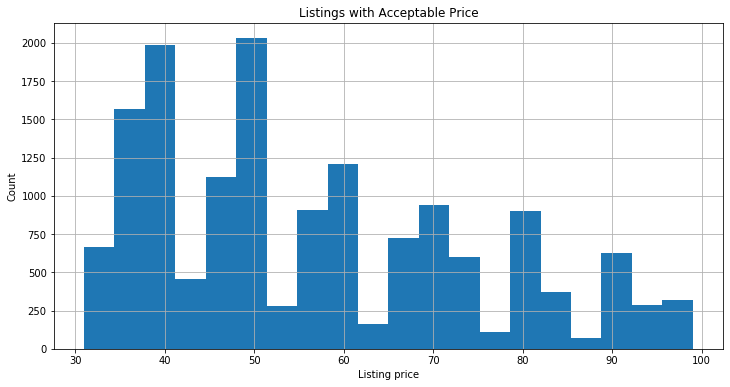

In [8]:
# 畫出可接受價位區間的資料 plot out the data with reasonable price
plt.figure(figsize=(12,6))
listing.loc[(listing.price<100)&(listing.price>30)].price.hist(bins=20)
plt.ylabel('Count')
plt.xlabel('Listing price')
plt.title('Listings with Acceptable Price')

# 畫出各區域價位區間

Plot out price range of different areas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

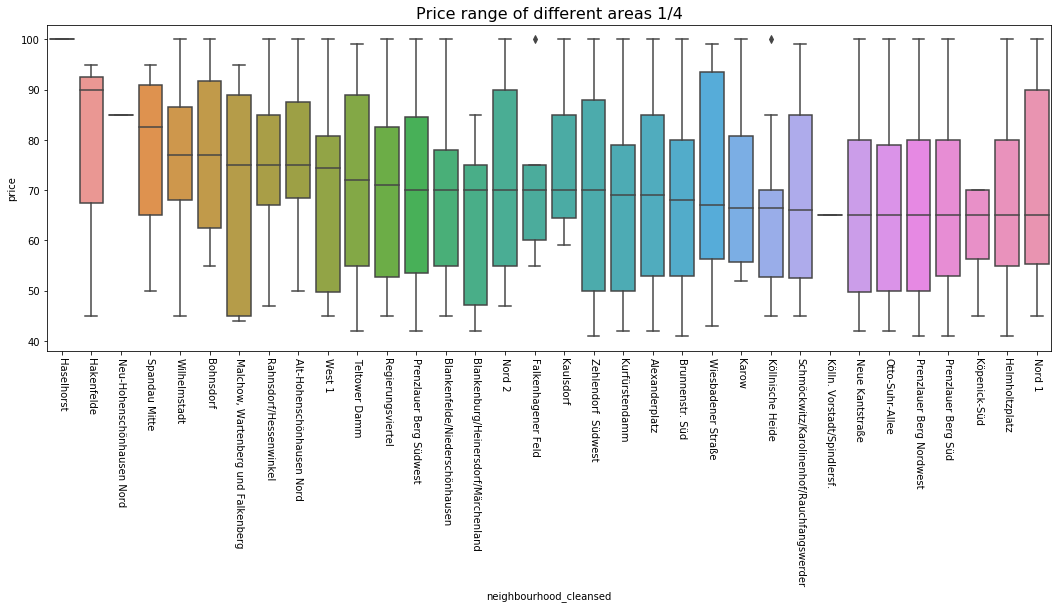

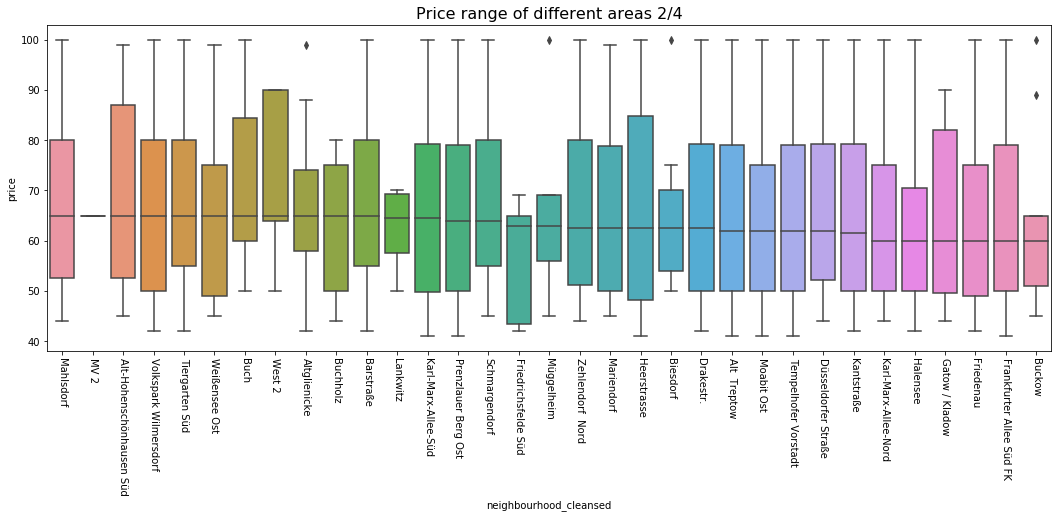

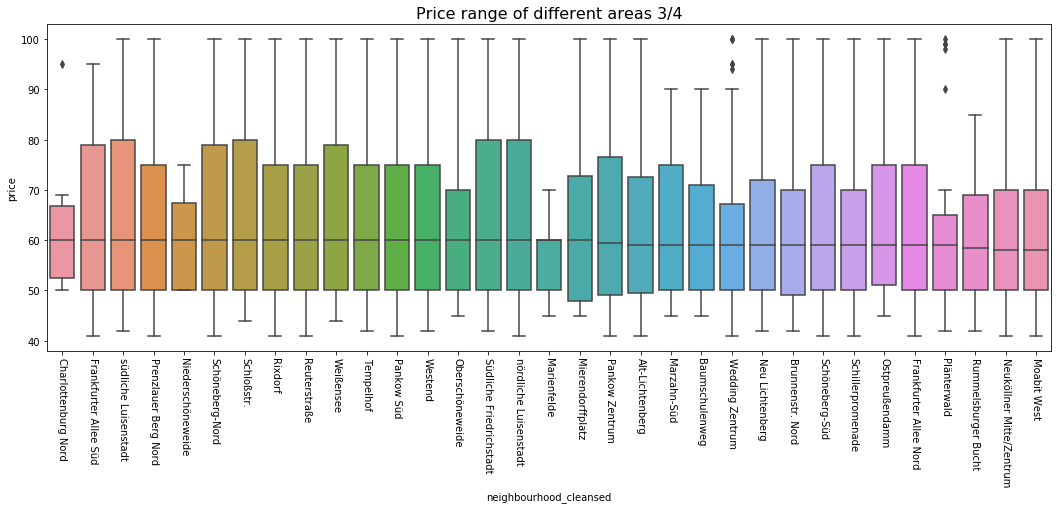

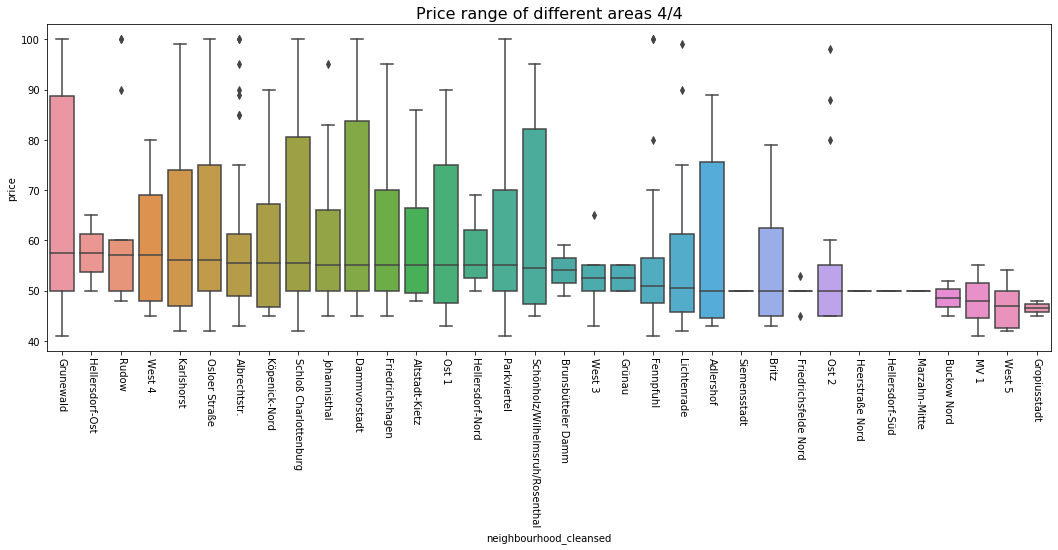

In [9]:
drop_outlier_price_condition = listing.loc[(listing.price<=100)&(listing.price>40)]
sort_price = drop_outlier_price_condition\
        .groupby('neighbourhood_cleansed')['price']\
        .median()\
        .sort_values(ascending=False)\
        .index
# 柏林共133的區域，由於區域眾多，先分四圖表畫出來看看
# due to the large numbers of areas in Berlin(133), plotted into 4 plots.
plt.figure(figsize=(18,6))   
plt.title('Price range of different areas 1/4', fontsize=16)
sns.boxplot(y='price', x='neighbourhood_cleansed', data=drop_outlier_price_condition, order=sort_price[:34])
plt.xticks(rotation=-90)

plt.figure(figsize=(18,6))   
plt.title('Price range of different areas 2/4', fontsize=16)
sns.boxplot(y='price', x='neighbourhood_cleansed', data=drop_outlier_price_condition, order=sort_price[34:67])
plt.xticks(rotation=-90)

plt.figure(figsize=(18,6))   
plt.title('Price range of different areas 3/4', fontsize=16)
sns.boxplot(y='price', x='neighbourhood_cleansed', data=drop_outlier_price_condition, order=sort_price[67:100])
plt.xticks(rotation=-90)

plt.figure(figsize=(18,6))   
plt.title('Price range of different areas 4/4', fontsize=16)
sns.boxplot(y='price', x='neighbourhood_cleansed', data=drop_outlier_price_condition, order=sort_price[100:])
plt.xticks(rotation=-90)

# 不同類型住房對價格的影響
The relation between different property types and price

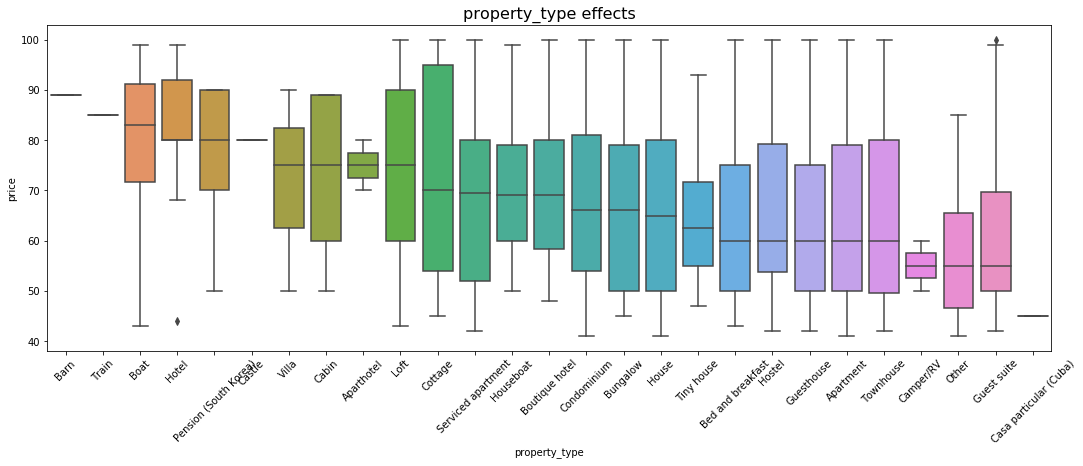

In [10]:
def boxplot_to_price(category_name):
    sort_price = drop_outlier_price_condition\
                .groupby(category_name)['price']\
                .median()\
                .sort_values(ascending=False)\
                .index
    plt.figure(figsize=(18,6))
    plt.title(category_name +' effects', fontsize=16)
    sns.boxplot(y='price', x=category_name, data=drop_outlier_price_condition, order=sort_price)
    plt.xticks(rotation=45)
boxplot_to_price('property_type')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 27 Text xticklabel objects>)

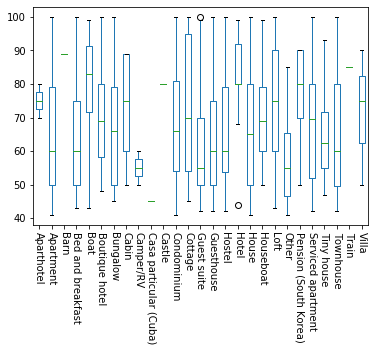

In [11]:
drop_outlier_price_condition.pivot(columns='property_type', values='price').plot(kind='box')
plt.xticks(rotation=-90)

# 住房包含設施數量前20名
The top 20 amenities listings contain

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

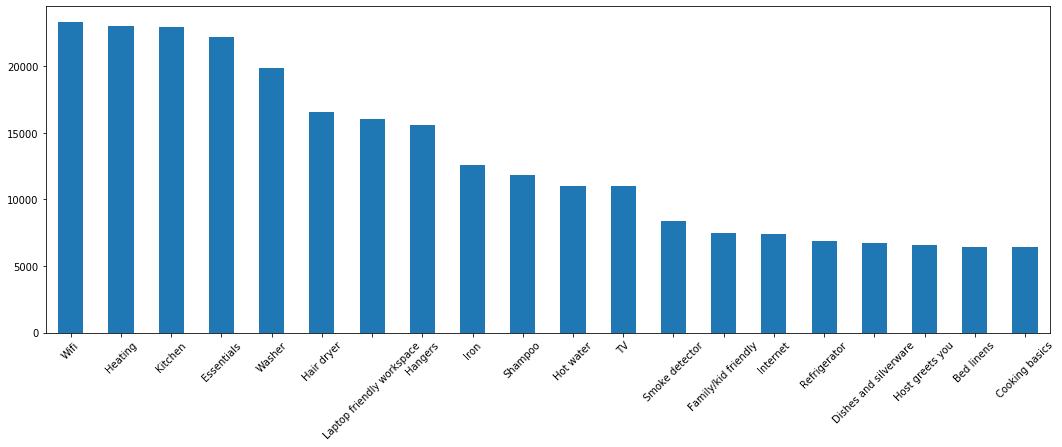

In [12]:
listing['amenities'] = listing.amenities.str.replace('[{}]', '').str.replace('"', '')
listing.amenities.head()
all_item_ls = np.concatenate(listing.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=(18 , 6))
Top20_item.plot(kind='bar')
plt.xticks(rotation=45)

# 住房包含設施數量後20名
The bottom 20 amenities listings contain

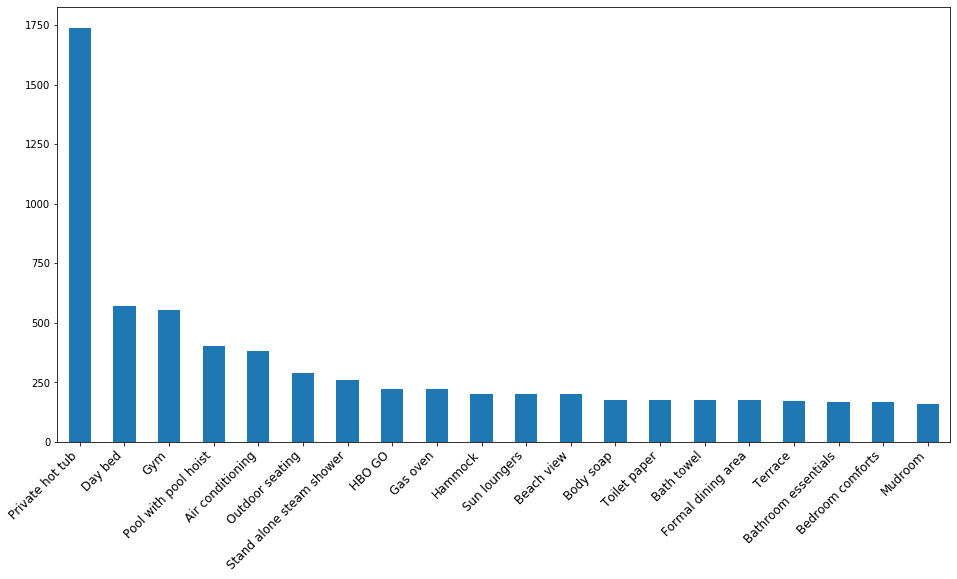

In [13]:
amenities = np.unique(np.concatenate(listing['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listing[listing['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
plt.figure(figsize=(16,8))
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

# 床的數量與價格關係
The relation between nembers of beds and price.

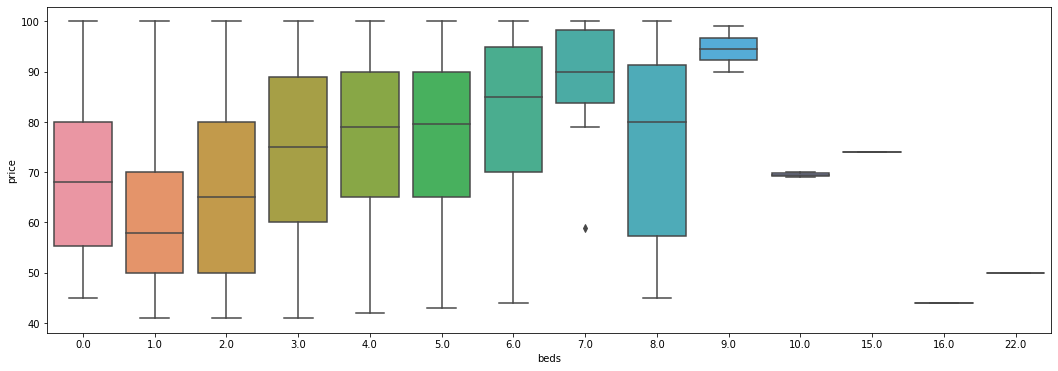

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(y='price', x='beds', data=drop_outlier_price_condition)
plt.show()

本日文章針對柏林房源先有個初步認識，接下來幾篇文章再進一步分析。<br>
Today we briefly walked through the listing data of Airbnb listings in Berlin, in the following articles, we will step a little deeper into analysing the listings.

[Code Reference](https://medium.com/finformation%E7%95%B6%E7%A8%8B%E5%BC%8F%E9%81%87%E4%B8%8A%E8%B2%A1%E5%8B%99%E9%87%91%E8%9E%8D/%E5%88%A9%E7%94%A8airbnb%E4%BE%86%E6%9B%B4%E4%BA%86%E8%A7%A3%E5%B1%85%E4%BD%8F%E5%9F%8E%E5%B8%82-%E4%BB%A5%E8%87%BA%E5%8C%97%E7%82%BA%E4%BE%8B-python%E5%AF%A6%E4%BD%9C-3f4903e8742)

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

[2] [利用Airbnb來更了解居住城市，以臺北為例 Python實作（上）](https://medium.com/finformation%E7%95%B6%E7%A8%8B%E5%BC%8F%E9%81%87%E4%B8%8A%E8%B2%A1%E5%8B%99%E9%87%91%E8%9E%8D/%E5%88%A9%E7%94%A8airbnb%E4%BE%86%E6%9B%B4%E4%BA%86%E8%A7%A3%E5%B1%85%E4%BD%8F%E5%9F%8E%E5%B8%82-%E4%BB%A5%E8%87%BA%E5%8C%97%E7%82%BA%E4%BE%8B-python%E5%AF%A6%E4%BD%9C-3f4903e8742)

[3] [Airbnb listings in Berlin](https://github.com/tgnco1218/Data-Cleaning-and-Scraping-30Days/blob/master/Day19_Airbnb_in_Berlin/Berlin_airbnb.ipynb)
